In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mmctools.wrf.preprocessing import CreateEtaLevels

# Generate eta levels with:
- ∆z = 20 m in first 1 km
- ∆z = 200 m up to 4 km
- Find good smoothing factor

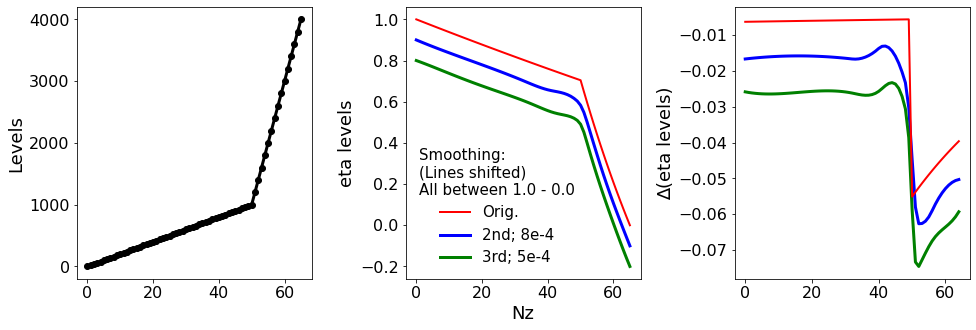

In [4]:
# Make list of levels:
levels = list(np.arange(0,1000.1,20.0)) + list(np.arange(1200,4000.1,200))

# Call CreateEtaLevels
eta_levels = CreateEtaLevels(levels=levels, # original levels
                             surface_temp=290.0, # surface temperature of the simulation
                             height_top=4000, # model top height
                             n_total_levels=len(levels)) # total number of levels
                                                         # in this case, equal to len(levels)

test_eta = eta_levels.eta_levels # Raw eta levels (no smoothing)

test_smoothA = eta_levels.smooth_eta_levels(smooth_fact=8e-4, # smoothing with quadratic
                                           smooth_degree=2)

test_smoothB = eta_levels.smooth_eta_levels(smooth_fact=5e-4, # smoothing with cubic
                                           smooth_degree=3)

# Plot the results!
fig,ax = plt.subplots(ncols=3,figsize=(16,5))
plt.subplots_adjust(wspace=0.4)
for axi in range(0,3):
    ax[axi].tick_params(labelsize=16)
ax[0].plot(levels,c='k',marker='o',lw=3.0)
ax[0].set_ylabel('Levels',size=18)

ax[1].plot(test_eta,c='r',lw=2.0,label='Orig.',ls='-')
ax[1].plot(test_smoothA-0.1,c='b',lw=3.0,label='2nd; 8e-4')
ax[1].plot(test_smoothB-0.2,c='g',lw=3.0,label='3rd; 5e-4')
#ax[1].plot(test_smoothC,c='m',lw=3.0,label='2nd; 4e-3')
ax[1].set_ylabel('eta levels',size=18)
ax[1].set_xlabel('Nz',size=18)

ax[2].plot(test_smoothA[1:] - test_smoothA[:-1]-0.01,c='b',lw=3.0)
ax[2].plot(test_smoothB[1:] - test_smoothB[:-1]-0.02,c='g',lw=3.0)
#ax[2].plot(test_smoothC[1:] - test_smoothC[:-1],c='m',lw=3.0)
ax[2].plot(test_eta[1:] - test_eta[:-1],c='r',lw=2.0)
ax[2].set_ylabel('∆(eta levels)',size=18)

ax[1].legend(frameon=False,fontsize=15,title='Smoothing:\n(Lines shifted)\nAll between 1.0 - 0.0',title_fontsize=15)
plt.show()

# Generate eta levels with:
- ∆z = 50 m in lowest km
- ∆z is defined the way WRF would to fill to model top
- Only giving 20 levels, the code will fill in up to 88 levels as specified

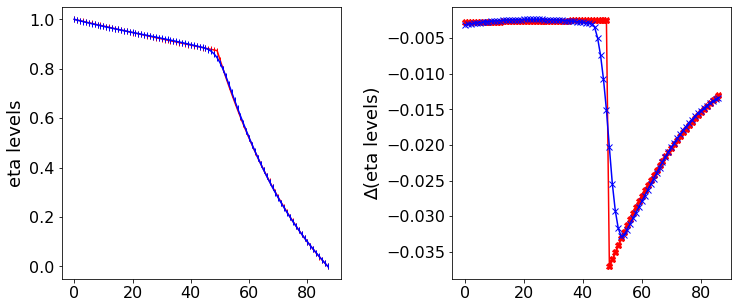

Note that d(eta) is smooth and there are no kinks in the eta levels!


In [5]:
levels = np.linspace(0,1000,50)
eta = CreateEtaLevels(levels=levels,
                       pres_top=10000.0, # model top pressure
                       surface_temp=282.72, # average surface temperature over domain
                       height_top=16229.028, # model top height
                       n_total_levels=88) # number of requested eta levels

# Eta levels w/out smoothing
eta_sharp = eta.eta_levels 

# Smoothed eta levels
eta_smooth = eta.smooth_eta_levels(smooth_fact=7e-4)

# Plot the results!
fig,ax = plt.subplots(ncols=2,figsize=(12,5))
plt.subplots_adjust(wspace=0.4)

ax[0].plot(eta_sharp,c='r',marker='|')
ax[0].plot(eta_smooth,c='b',marker='|')
ax[0].set_ylabel('eta levels',size=18)

ax[1].plot(eta_sharp[1:] - eta_sharp[:-1],c='r',marker='X')
ax[1].plot(eta_smooth[1:] - eta_smooth[:-1],c='b',marker='x')
ax[1].set_ylabel('∆(eta levels)',size=18)

for axi in range(0,2):
    ax[axi].tick_params(labelsize=16)
plt.show()

print('Note that d(eta) is smooth and there are no kinks in the eta levels!')

# Print the eta levels for easy copy/paste into a namelist.input:

88 levels
1.00000, 0.99726, 0.99453, 0.99181, 
0.98909, 0.98638, 0.98368, 0.98098, 
0.97829, 0.97561, 0.97293, 0.97026, 
0.96760, 0.96494, 0.96229, 0.95965, 
0.95701, 0.95438, 0.95176, 0.94914, 
0.94653, 0.94392, 0.94133, 0.93873, 
0.93615, 0.93357, 0.93100, 0.92843, 
0.92587, 0.92331, 0.92077, 0.91823, 
0.91569, 0.91316, 0.91064, 0.90812, 
0.90561, 0.90311, 0.90061, 0.89812, 
0.89563, 0.89315, 0.89068, 0.88821, 
0.88575, 0.88329, 0.88085, 0.87840, 
0.87597, 0.87353, 0.83648, 0.80046, 
0.76545, 0.73142, 0.69834, 0.66619, 
0.63494, 0.60457, 0.57504, 0.54634, 
0.51845, 0.49134, 0.46499, 0.43937, 
0.41448, 0.39028, 0.36676, 0.34389, 
0.32167, 0.30007, 0.27908, 0.25867, 
0.23883, 0.21955, 0.20081, 0.18260, 
0.16489, 0.14769, 0.13096, 0.11470, 
0.09890, 0.08354, 0.06861, 0.05410, 
0.03999, 0.02628, 0.01295, 0.00000, 


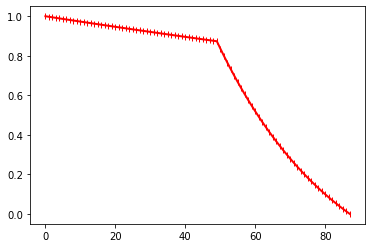

In [6]:
eta.print_eta_levels()

plt.plot(eta.eta_levels,marker='|',c='r',label='Smoothed',lw=2.0)

plt.show()

# Smoothing specified eta levels:

In [7]:
# Original eta levels from some simulation:
orig_lvls = np.asarray([1.000000, 0.998683, 0.997367, 0.996053, 0.994740, 0.993429, 0.992120, 0.990812,
0.989505, 0.988201, 0.986897, 0.985596, 0.984295, 0.982997, 0.981700, 0.980404,
0.979110, 0.977817, 0.976526, 0.975237, 0.973949, 0.972663, 0.971378, 0.970094,
0.968812, 0.967532, 0.966253, 0.964976, 0.963700, 0.962426, 0.961153, 0.959882,
0.958612, 0.957344, 0.956077, 0.954812, 0.953548, 0.952286, 0.951025, 0.949766,
0.948509, 0.947252, 0.945997, 0.944744, 0.943492, 0.942242, 0.940993, 0.939746,
0.938500, 0.937256, 0.936013, 0.934771, 0.933531, 0.932293, 0.931056, 0.929820,
0.928586, 0.927354, 0.926122, 0.924893, 0.923664, 0.922438, 0.921212, 0.919988,
0.918766, 0.917545, 0.916325, 0.915107, 0.913891, 0.912675, 0.911462, 0.910249,
0.909038, 0.907829, 0.906621, 0.905414, 0.904208, 0.902931, 0.901579, 0.900149,
0.898637, 0.897040, 0.895353, 0.893573, 0.891697, 0.889720, 0.887639, 0.885450,
0.883149, 0.880735, 0.878202, 0.875548, 0.872771, 0.869868, 0.866836, 0.863675,
0.860383, 0.856959, 0.853404, 0.849716, 0.845897, 0.841950, 0.837876, 0.833677,
0.829359, 0.824925, 0.820381, 0.815733, 0.810987, 0.806151, 0.801234, 0.796243,
0.791189, 0.786081, 0.780929, 0.775745, 0.770540, 0.765324, 0.760135, 0.754419,
0.748128, 0.741213, 0.733621, 0.725296, 0.716182, 0.706221, 0.695353, 0.683519,
0.670663, 0.656729, 0.641667, 0.625433, 0.607990, 0.589314, 0.569392, 0.548226,
0.525840, 0.502275, 0.477595, 0.451891, 0.425277, 0.397894, 0.369907, 0.341502,
0.312888, 0.284283, 0.255917, 0.228020, 0.200817, 0.174520, 0.149320, 0.125380,
0.102836, 0.081787, 0.062295, 0.044389, 0.028065, 0.013288, 0.000000,])

# These really aren't that bad, so let's make them bad...
orig_lvls*=orig_lvls**3

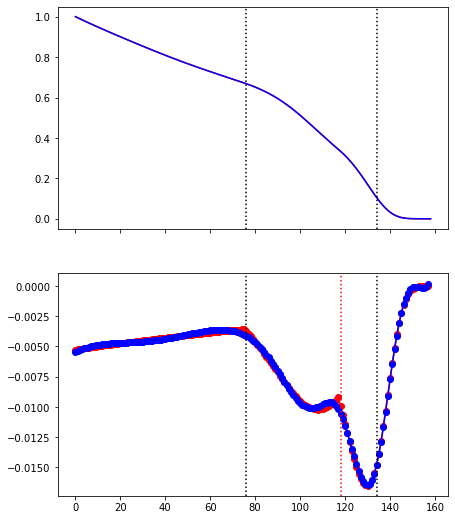

159 levels
1.00000, 0.99474, 0.98951, 0.98431, 
0.97913, 0.97397, 0.96885, 0.96375, 
0.95868, 0.95363, 0.94861, 0.94362, 
0.93864, 0.93370, 0.92878, 0.92389, 
0.91902, 0.91418, 0.90936, 0.90457, 
0.89980, 0.89505, 0.89033, 0.88564, 
0.88096, 0.87632, 0.87169, 0.86709, 
0.86252, 0.85796, 0.85343, 0.84893, 
0.84445, 0.83999, 0.83555, 0.83113, 
0.82674, 0.82237, 0.81803, 0.81370, 
0.80940, 0.80512, 0.80086, 0.79663, 
0.79242, 0.78822, 0.78405, 0.77991, 
0.77578, 0.77167, 0.76759, 0.76352, 
0.75948, 0.75546, 0.75146, 0.74747, 
0.74351, 0.73957, 0.73565, 0.73176, 
0.72787, 0.72402, 0.72018, 0.71636, 
0.71256, 0.70878, 0.70501, 0.70127, 
0.69755, 0.69385, 0.69017, 0.68650, 
0.68285, 0.67923, 0.67562, 0.67203, 
0.66846, 0.66469, 0.66072, 0.65653, 
0.65213, 0.64751, 0.64265, 0.63756, 
0.63222, 0.62663, 0.62079, 0.61469, 
0.60833, 0.60170, 0.59481, 0.58765, 
0.58023, 0.57255, 0.56461, 0.55642, 
0.54798, 0.53931, 0.53042, 0.52131, 
0.51200, 0.50251, 0.49285, 0.48305, 
0.47312, 0.46308, 0.45296, 

In [8]:
# Call eta levels into CreateEtaLevels:
orig_eta = CreateEtaLevels(eta_levels=orig_lvls)
# Call the smoothing function:
smooth_eta = orig_eta.smooth_eta_levels(smooth_fact=5e-6,smooth_degree=4)

# Plot the result!
fig,ax = plt.subplots(nrows=2,figsize=(7,9),sharex=True)

ax[0].plot(orig_lvls,c='r')
ax[0].plot(smooth_eta,c='b')
ax[0].axvline(76,ls=':',c='k')
ax[0].axvline(134,ls=':',c='k')

ax[1].plot(orig_lvls[1:]-orig_lvls[:-1],marker='o',c='r')
ax[1].plot(smooth_eta[1:]-smooth_eta[:-1],marker='o',c='b')
ax[1].axvline(76,ls=':',c='k')
ax[1].axvline(134,ls=':',c='k')
ax[1].axvline(118,ls=':',c='r')
plt.show()
orig_eta.print_eta_levels()

In [ ]:
def generate_eta_levels(levels=None,
                        surface_temp=290,
                        pres_top=2000,
                        height_top=14417.41,
                        p0=100000.0,
                        fill_to_top=True,
                        n_total_levels=None,
                        smooth_eta=True):
    
    '''
    Generate a list of eta levels for WRF simulations. Core of the eta level code
    comes from Tim Juliano of NCAR.
    
    Usage:
    =====
    levels : list or array
        The list of levels you want to convert to eta levels
    surface_temp : float
        average temperature at the surface
    pres_top : float
        pressure at the top of the domain
    height_top : float
        height of the top of the domain
    p0 :float
        reference pressure / pressure at the surface
    n_total_levels : int
        number of total levels. If levels does not reach the model
        top, then this needs to be specified so that the code 
        knows how many more levels to generate
    fill_to_top : boolean
        if len(levels) != n_total_levels then this tells the code
        to fill to the top or not
    smooth_eta : boolean
        If true, this will use a spline interpolation on the d(eta)
        levels and re-normalize between 1.0 and 0.0 so that there
        is a smooth transition between the specified levels and the
        filled levels.
                             
    Examples:
    1. Levels specified to the model top:

    eta_levels = generate_eta_levels(levels=np.arange(0,4000.1,20.0),
                                     pres_top=62500.0,
                                     surface_temp=290.0,
                                     height_top=4000,
                                     n_total_levels=201,
                                     smooth_eta=False
                                     )
                                     
    
    2. Only specify lower levels and let the program fill the rest (no smoothing):

    eta_levels = generate_eta_levels(levels=np.linspace(0,1000,50),
                                     pres_top=10000.0,
                                     surface_temp=282.72,
                                     height_top=16229.028,
                                     n_total_levels=88,
                                     smooth_eta=False
                                     )

    3. Smooth the eta levels so there are no harsh jumps in d(eta):
    
    eta_levels = generate_eta_levels(levels=np.linspace(0,1000,50),
                                     pres_top=10000.0,
                                     surface_temp=282.72,
                                     height_top=16229.028,
                                     n_total_levels=88,
                                     smooth_eta=True
                                     )

    '''
    
    if (levels is None) or ((type(levels) is not list) and (type(levels) is not np.array) and (type(levels) is not np.ndarray)):
        print('Please specify levels in list or array')
        return
    else:        
        if not (all((isinstance(z, float) or isinstance(z, int) or isinstance(z, np.int64)) for z in levels)):
            print('Levels must be of type float or integer')
            return
        if type(levels) is list:
            levels = np.asarray(levels)

    gas_constant_dry_air = 287.06
    gravity = 9.80665
    M = 0.0289644
    universal_gas_constant = 8.3144598
    
    
    pressure_calc = 0
    if pressure_calc == 0:
        pressure = p0*np.exp((-gravity*levels)/gas_constant_dry_air/surface_temp)
    elif pressure_calc == 1:
        pressure = p0*np.exp((-gravity*M*levels/(universal_gas_constant*surface_temp)))
    eta_levels = np.zeros(n_total_levels)
    
    eta_levels[:len(levels)] = (pressure-pres_top)/(p0-pres_top)
    
    if np.max(levels) < height_top:
        if (n_total_levels is None) or (n_total_levels <= len(levels)):
            print('must specify n_total_levels to complete eta_levels to model top')
            return
        remaining_levels = n_total_levels - len(levels)
        
        eta_levels_top = np.zeros(remaining_levels+2)
        z_scale = 0.4
        for k in range(1,remaining_levels+2):
            kind = k-1
            eta_levels_top[kind] = (np.exp(-(k-1)/float(n_total_levels)/z_scale) - np.exp(-1./z_scale))/ (1.-np.exp(-1./z_scale))
        eta_levels_top -= eta_levels_top[-2]
        eta_levels_top = eta_levels_top[:-1]
        eta_levels_top /= np.max(eta_levels_top)
        eta_levels_top *= eta_levels[len(levels)-1]

        eta_levels[len(levels):] = eta_levels_top[1:]
        
        if smooth_eta:

            deta_x = np.arange(0,n_total_levels-1)
            deta = eta_levels[1:] - eta_levels[:-1]
            spl = UnivariateSpline(deta_x,deta,k=2)

            spl.set_smoothing_factor(7e-4)
            #plt.plot(deta_x,spl(deta_x))
            deta_x = np.arange(0,n_total_levels-1)
            new_deta = spl(deta_x)
            #plt.plot(deta_x,eta_levels[1:] - eta_levels[:-1],label='{}'.format(z_scale),color='g')
            
            
            final_eta_levels = np.ones(len(new_deta)+1)
            for ee,eta in enumerate(final_eta_levels[1:]):
                final_eta_levels[ee+1] = 1 + sum(new_deta[:ee+1])
            final_eta_levels -= min(final_eta_levels)
            final_eta_levels /= max(final_eta_levels)
        else:
            final_eta_levels = eta_levels
    else:
        final_eta_levels = eta_levels
        
    if final_eta_levels[-1] != 0.0:
        final_eta_levels[-1] = 0.0
            
            
    return(final_eta_levels)

In [ ]:
class create_eta_levels():
    '''
    Generate a list of eta levels for WRF simulations. Core of the eta level code
    comes from Tim Juliano of NCAR. Alternatively, the user can provide a list of
    eta levels and use the smooth_eta_levels feature.
    
    Usage:
    =====
    levels : list or array
        The list of levels you want to convert to eta levels
    surface_temp : float
        average temperature at the surface
    pres_top : float
        pressure at the top of the domain
    height_top : float
        height of the top of the domain
    p0 :float
        reference pressure / pressure at the surface
    n_total_levels : int
        number of total levels. If levels does not reach the model
        top, then this needs to be specified so that the code 
        knows how many more levels to generate
    fill_to_top : boolean
        if len(levels) != n_total_levels then this tells the code
        to fill to the top or not
    smooth_eta : boolean
        If true, this will use a spline interpolation on the d(eta)
        levels and re-normalize between 1.0 and 0.0 so that there
        is a smooth transition between the specified levels and the
        filled levels.
                             
    Examples:
    1. Levels specified to the model top:

    eta_levels = generate_eta_levels(levels=np.arange(0,4000.1,20.0),
                                     pres_top=62500.0,
                                     surface_temp=290.0,
                                     height_top=4000,
                                     n_total_levels=201,
                                     smooth_eta=False
                                     )
                                     
    
    2. Only specify lower levels and let the program fill the rest (no smoothing):

    eta_levels = generate_eta_levels(levels=np.linspace(0,1000,50),
                                     pres_top=10000.0,
                                     surface_temp=282.72,
                                     height_top=16229.028,
                                     n_total_levels=88,
                                     smooth_eta=False
                                     )

    3. Smooth the eta levels so there are no harsh jumps in d(eta):
    
    eta_levels = generate_eta_levels(levels=np.linspace(0,1000,50),
                                     pres_top=10000.0,
                                     surface_temp=282.72,
                                     height_top=16229.028,
                                     n_total_levels=88,
                                     smooth_eta=True
                                     )

    '''
    
    def __init__(self, levels=None,
                 eta_levels=None,
                 surface_temp=290,
                 pres_top=None,
                 height_top=14417.41,
                 p0=100000.0,
                 fill_to_top=True,
                 n_total_levels=None):
    
        if eta_levels is not None:
            self.eta_levels = eta_levels
        else:
            if (levels is None) or ((type(levels) is not list) and (type(levels) is not np.array) and (type(levels) is not np.ndarray)):
                print('Please specify levels in list or array')
                return
            else:        
                if not (all((isinstance(z, float) or isinstance(z, int) or isinstance(z, np.int64)) for z in levels)):
                    print('Levels must be of type float or integer')
                    return
                if type(levels) is list:
                    levels = np.asarray(levels)

            self.levels = levels

            if n_total_levels < len(self.levels):
                print('Setting n_total_levels to be len(levels).')
                n_total_levels = len(levels)

            pressure = self._pressure_calc(surface_temp,height_top,p0)
            if pres_top is None:
                pres_top = pressure[-1]

            self.eta_levels = self._eta_level_calc(pressure,pres_top,height_top,p0,n_total_levels,fill_to_top)
        

    def _pressure_calc(self,surface_temp,
                       height_top,
                       p0,
                       pres_calc_option=1):
        gas_constant_dry_air = 287.06
        gravity = 9.80665
        M = 0.0289644
        universal_gas_constant = 8.3144598

        if pres_calc_option == 1:
            pressure = p0*np.exp((-gravity*self.levels)/gas_constant_dry_air/surface_temp)
        elif pres_calc_option == 2:
            pressure = p0*np.exp((-gravity*M*self.levels/(universal_gas_constant*surface_temp)))
        else:
            print('pres_calc_option = {} is not a valid option. Please select 1 or 2'.format(pres_calc_option))

        return(pressure)
    
    def _eta_level_calc(self,pressure,
                        pres_top,
                        height_top,
                        p0,
                        n_total_levels,
                        fill_to_top):
        
        eta_levels = np.zeros(n_total_levels)

        eta_levels[:len(self.levels)] = (pressure-pres_top)/(p0-pres_top)

        if np.max(self.levels) < height_top:
            if (n_total_levels is None) or (n_total_levels <= len(self.levels)):
                print('Insufficient number of levels to reach model top.')
                print('Height top: {}, top of specified levels: {}, number of levels: {}'.format(
                                height_top,self.levels[-1],n_total_levels))
                print('Must specify n_total_levels to complete eta_levels to model top')
                return
            remaining_levels = n_total_levels - len(self.levels)

            eta_levels_top = np.zeros(remaining_levels+2)
            z_scale = 0.4
            for k in range(1,remaining_levels+2):
                kind = k-1
                eta_levels_top[kind] = (np.exp(-(k-1)/float(n_total_levels)/z_scale) - np.exp(-1./z_scale))/ (1.-np.exp(-1./z_scale))
            eta_levels_top -= eta_levels_top[-2]
            eta_levels_top = eta_levels_top[:-1]
            eta_levels_top /= np.max(eta_levels_top)
            eta_levels_top *= eta_levels[len(self.levels)-1]

            eta_levels[len(self.levels):] = eta_levels_top[1:]
            
        return(eta_levels)
    
    def smooth_eta_levels(self,
                          smooth_fact=7e-4,
                          smooth_degree=2):
        
        eta_levels = self.eta_levels
        deta_x = np.arange(0,len(eta_levels)-1)
        deta = eta_levels[1:] - eta_levels[:-1]
        
        spl = UnivariateSpline(deta_x,deta,k=smooth_degree)

        spl.set_smoothing_factor(smooth_fact)
        deta_x = np.arange(0,len(eta_levels)-1)
        new_deta = spl(deta_x)


        final_eta_levels = np.ones(len(new_deta)+1)
        for ee,eta in enumerate(final_eta_levels[1:]):
            final_eta_levels[ee+1] = 1 + sum(new_deta[:ee+1])
        final_eta_levels -= min(final_eta_levels)
        final_eta_levels /= max(final_eta_levels)
        
        return(final_eta_levels)
            

    